In [1]:
import numpy as np
import matplotlib.pyplot as plt

from collections import namedtuple

## Named Tuples

Approaching interpolation using named tuples

In [5]:
Student = namedtuple('Student', ['name', 'surname', 'mark'])

In [6]:
s1 = Student('John', 'Smith', 30)

In [7]:
s1.surname

'Smith'

In [9]:
Circle = namedtuple('Circle', ['cx', 'cy', 'r'])
my_circle = Circle(0, 0, 7)

In [10]:
my_circle.r

7

When interpolating a function we need three things:
- nodes
- points
- matrix

We can use named tuples to pack them all together

In [11]:
ApproximationOperator = namedtuple('ApproximationOperator', ['q', 'x', 'M'])

In [20]:
def build_lagrangian_basis(q,x):
    """
    This function takes two 1D numpy array, q and x, and returns
    a matrix M such that M[i,j] is the evaluation of the polynomial
    ell_i on point x_j
    """
    n_nodes = q.shape[0]
    n_evaluation_points = x.shape[0]
    
    M = np.zeros((n_evaluation_points, n_nodes), dtype=np.float64)
    
    for i in range(n_evaluation_points):
        for j in range(n_nodes):
            M[i,j] = 1
            for k in range(n_nodes):
                if j==k:
                    continue
                M[i,j] = M[i,j] * (x[i]-q[j])/(q[k]-q[j])
                
    return M

    

In [21]:
my_q = np.linspace(0,1,5)
my_x = np.linspace(0,1,7)
build_lagrangian_basis(my_q, my_x)

array([[ 0.00000000e+00, -1.66666667e-01,  4.00000000e+00,
        -1.35000000e+01,  1.06666667e+01],
       [ 8.23045267e-03, -2.05761317e-03,  7.90123457e-01,
        -4.94032922e+00,  5.14403292e+00],
       [ 1.31687243e-01, -2.05761317e-03,  4.93827160e-02,
        -1.28600823e+00,  2.10699588e+00],
       [ 6.66666667e-01, -1.66666667e-01,  0.00000000e+00,
        -1.66666667e-01,  6.66666667e-01],
       [ 2.10699588e+00, -1.28600823e+00,  4.93827160e-02,
        -2.05761317e-03,  1.31687243e-01],
       [ 5.14403292e+00, -4.94032922e+00,  7.90123457e-01,
        -2.05761317e-03,  8.23045267e-03],
       [ 1.06666667e+01, -1.35000000e+01,  4.00000000e+00,
        -1.66666667e-01,  0.00000000e+00]])

In [22]:
def build_equispace_interpolator(n_nodes, x):
    """
    Build the operator that interpolates a function on [0,1]
    using n_nodes, equally spaced."""
    q = np.linspace(0,1,n_nodes)
    M = build_lagrangian_basis(q,x)
    return ApproximationOperator(q,x,M)

In [23]:
def f1(x):
    return np.sin(np.pi*x)

In [25]:
evaluation_points = np.linspace(0,1,257)

In [27]:
I_4 = build_equispace_interpolator(4, evaluation_points)

In [30]:
evaluation_of_interpolation = I_4.M @ f1(I_4.q) # this is matrix prod

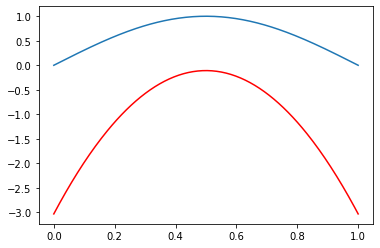

In [32]:
plt.plot(evaluation_points, f1(evaluation_points))
plt.plot(evaluation_points, evaluation_of_interpolation, color='red')